In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq
%matplotlib inline
plt.rcParams['figure.figsize']=[10, 6]
plt.rcParams.update({'font.size':14})
HAMMING = 1024
DOWN_SAMPLE = 11025 # Downsample constant of 11.025 kHz

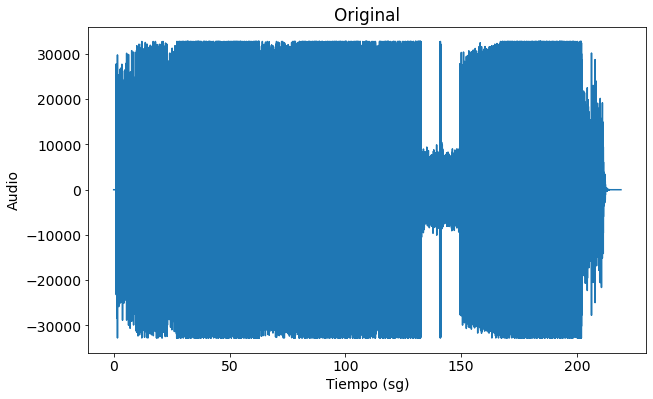

In [11]:
sample_rate, sample = wavfile.read(r'/Users/kmontocam/Documents/GitHub/tracks/PistaBangarang.wav') # Read song as stereo
sample = sample.sum(axis = 1) / 2 # Mono channel

sample = sample[:int(len(sample))]

n = np.arange(0, len(sample))/sample_rate # Array of seconds in song

plt.plot(n, sample)
plt.xlabel('Tiempo (sg)')
plt.ylabel('Audio')
plt.title('Original')
plt.show()

/Users/kmontocam/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


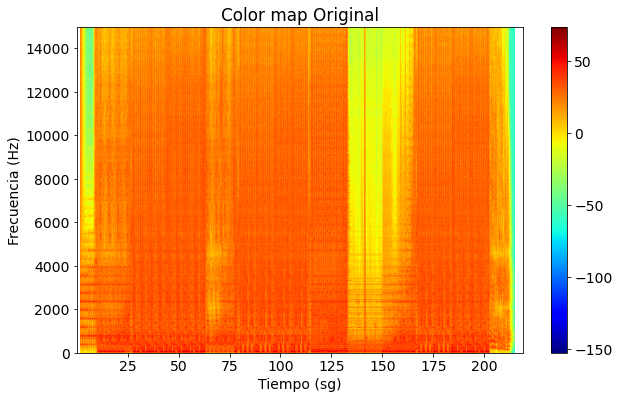

In [10]:
### ESPECTROGRAMA ORIGINAL ###

plt.specgram(sample, NFFT = 5000, noverlap = 500, Fs = sample_rate, cmap = 'jet')
plt.colorbar()
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Color map Original')
plt.ylim(0, 15000) # Visible hasta 15,000 Hz
plt.show()

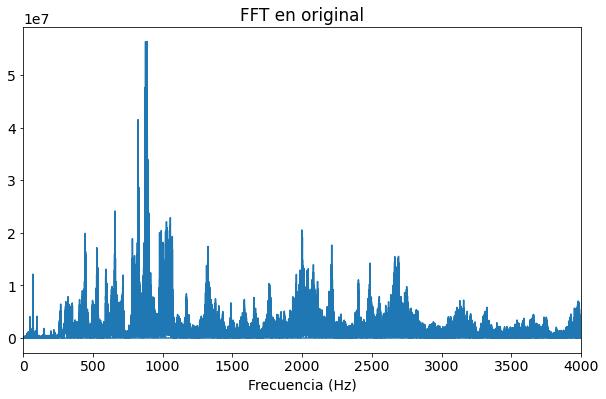

In [174]:
### FFT ORIGINAL ###

yf = fft(sample)
xf = fftfreq(len(sample), 1 / sample_rate)
plt.plot(xf, np.abs(yf))
plt.xlim(0, 4000)
plt.xlabel('Frecuencia (Hz)')
plt.title('FFT en original')
plt.show()

2414475

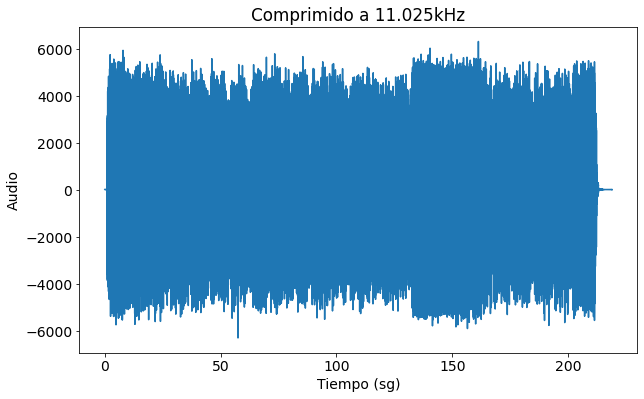

In [13]:
### COMPRESIÓN Y ELIMINAR FRECUENCIAS SUPERIORES A 5KHZ

sample[sample > 5000], sample[sample < -5000] = 0, 0  # Avoid aliasing by removing frequencies above 5khz

sample_time = round(len(sample)/sample_rate) # Seconds in track
samps = sample_time * DOWN_SAMPLE

Y = signal.resample(sample, samps)
xnew = np.linspace(0, sample_time, samps)

plt.plot(xnew, Y)
plt.xlabel('Tiempo (sg)')
plt.ylabel('Audio')
plt.title('Comprimido a 11.025kHz')

len(Y)

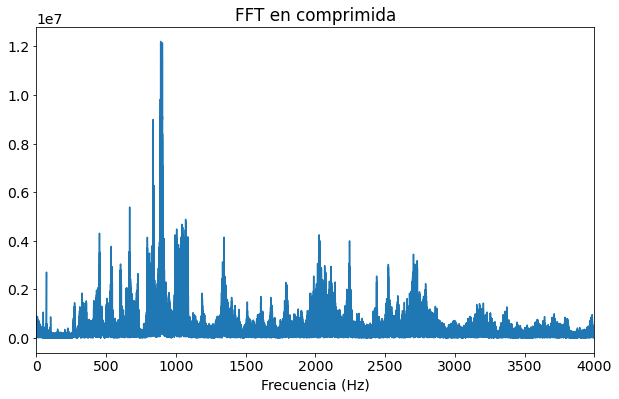

In [176]:
### FFT EN COMPRESIÓN ###

yf = fft(Y)
xf = fftfreq(len(Y), 1 / DOWN_SAMPLE)
plt.plot(xf, np.abs(yf))
plt.xlim(0, 4000)
plt.xlabel('Frecuencia (Hz)')
plt.title('FFT en comprimida')
plt.show()

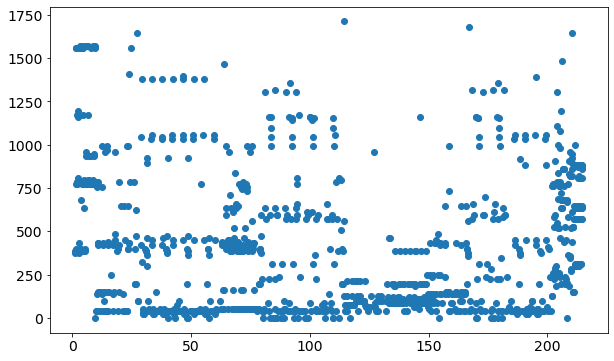

In [14]:
def fingerprint(audio, HAMMING):
    freq_times = list()
    freq_highs = list()

    for limit_inf, limit_sup in zip(range(0, len(audio), HAMMING), range(0, len(audio), HAMMING)[1:]):
        
        audio_hammed = audio[limit_inf: limit_sup]

        yf = np.abs(fft(audio_hammed)) # Apply FFT on interval
        yf = yf[:len(yf)//2] # Take only the positive half
        xf = fftfreq(len(audio_hammed), 1 / DOWN_SAMPLE) # Fix values as Hz
        xf = xf[:len(xf)//2] # Take only the positive half

        bin1 = max(yf[:10]) # Very low sound
        bin2 = max(yf[10:20]) # Low sound from band
        bin3 = max(yf[20: 40]) #...
        bin4 = max(yf[40: 80])
        bin5 = max(yf[80: 160])
        bin6 = max(yf[160:])

        bin_package = np.array([bin1, bin2, bin3, bin4, bin5])
        bin_mean = np.mean(bin_package)

        yf_highs = [f for f in bin_package if f > (1.5 * bin_mean)]

        for ite in yf_highs:
            position = np.where(yf == ite)[0][0]
            freq_times.append((limit_inf + position)/DOWN_SAMPLE)
            freq_highs.append(xf[position])
    
    return freq_times, freq_highs


freq_times, freq_highs = fingerprint(Y, HAMMING)
        
plt.scatter(freq_times, freq_highs)
plt.show()

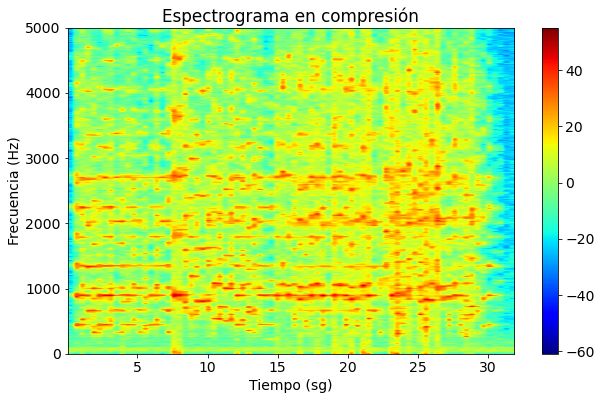

In [155]:
### ESPECTROGRAMA EN COMPRESIÓN ###

plt.specgram(Y, NFFT = 5000, noverlap = 500, Fs = DOWN_SAMPLE, cmap = 'jet')
plt.colorbar()
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma en compresión')
plt.ylim(0, 5000)
plt.show()

In [190]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 11025  # Sample rate
seconds = 30  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate = fs, channels = 1)
sd.wait()  # Wait until recording is finished
# write('sampleBangarang.wav', fs, myrecording)  # Save as WAV file

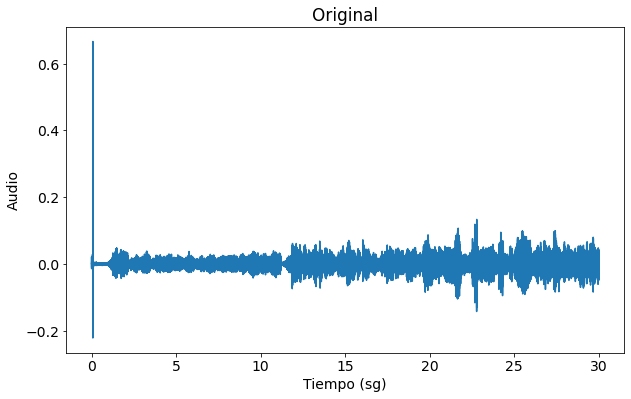

In [140]:
interval_recording = np.linspace(0,30,fs*30)
plt.plot(interval_recording, myrecording.flatten())
plt.xlabel('Tiempo (sg)')
plt.ylabel('Audio')
plt.title('Original')
#plt.ylim(-5000,5000)
plt.show()

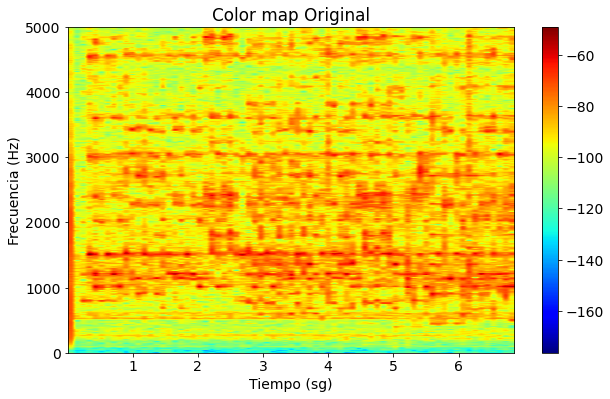

In [141]:
plt.specgram(myrecording.flatten(), NFFT = 5000, noverlap = 500, Fs = sample_rate, cmap = 'jet')
plt.colorbar()
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Color map Original')
plt.ylim(0, 5000)
plt.show()